In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generating X and calculating y from it

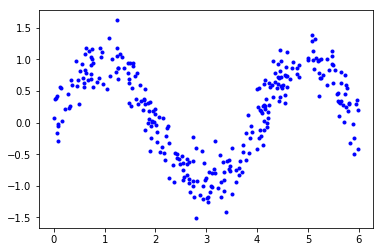

In [9]:
sigma=0.25
X=np.array(np.random.uniform(0,6,300))
func=np.sin((X*np.pi)/2.0)
y=np.array(func+np.random.normal(0,sigma,300))
sorted_x =np.sort(X)
plt.plot(X,y,'b.')


# Separating X into training and test data

In [10]:
training,test=X[:240], X[240:]

# Converting training data to matrix

In [11]:
actualinput=np.matrix(training).T
print(actualinput.shape)
m=actualinput.shape[0]
print(m)

(240, 1)
240


# Concatenating 1 to the training data matrix

In [12]:
X = np.concatenate([np.ones([m,1]),actualinput],1)

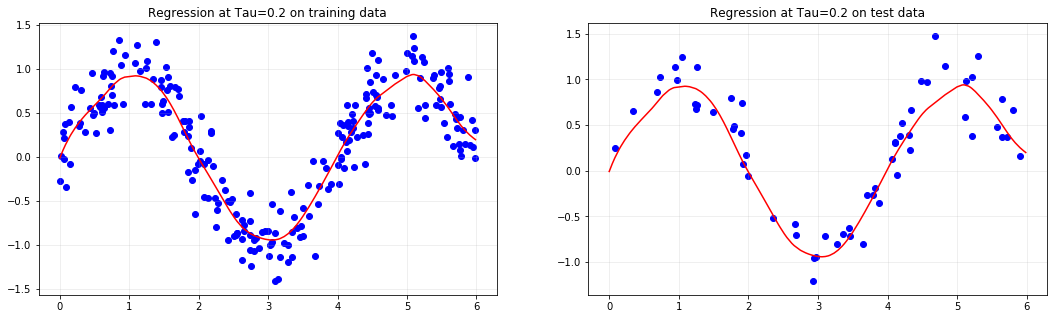

In [13]:
def funct(point, ip, tau):
    m,n=np.shape(ip)
    weights=np.mat(np.eye((m)))
    
    for j in range(m):
        diff=point-ip[j]
        weights[j,j]=np.exp(diff*diff.T/(-2.0*tau**2))
    return weights
    
def localweight(point, ip, op, tau):
    wt=funct(point, ip, tau)
    w=(ip.T*(wt*ip)).I*(ip.T*wt*op.T)
    return w

def lwr(ip,output,tau):
    m,n=np.shape(ip)
    ypredicted=np.zeros(m)
    for i in range(m):
        ypredicted[i]=ip[i]*localweight(ip[i],ip,output, tau)
    return ypredicted

#Generating y from training dataset matrix
func1=np.sin((training*np.pi)/2.0)
origy=np.array(func1+np.random.normal(0,sigma,240))
actualy=np.matrix(origy)

#calculating locally weighted based on training data, y based on training data and value of tau=0.2
ypred=lwr(X,actualy,0.2)

#sorting input data on axis =0
xsort=X.copy()
xsort.sort(axis=0)

func2=np.sin((test*np.pi)/2.0)
origy1=np.array(func2+np.random.normal(0,sigma,60))
actualy1=np.matrix(origy1)


fig, ax=plt.subplots(1,3)
fig.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
fig.set_figheight(5)
fig.set_figwidth(20)

plt1=plt.subplot(1,2,1)
plt2=plt.subplot(1,2,2)
# plotting scatter plot for training data and its output
plt1.scatter(training, origy, color='blue')
plt1.set_title("Regression at Tau=0.2 on training data")
plt1.grid(axis='both',alpha=0.25)
plt1.plot(xsort[:,1],ypred[X[:,1].argsort(0)], color='red')


plt2.scatter(test, origy1, color='blue')
plt2.set_title("Regression at Tau=0.2 on test data")
plt2.grid(axis='both',alpha=0.25)
plt2.plot(xsort[:,1],ypred[X[:,1].argsort(0)], color='red')




plt.show()

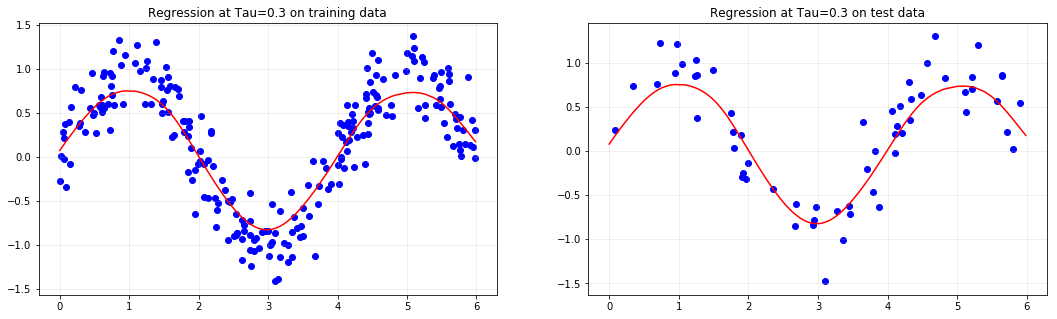

In [14]:
#calculating locally weighted based on training data, y based on training data and value of tau=0.2
ypred=lwr(X,actualy,0.4)

#sorting input data on axis =0
xsort=X.copy()
xsort.sort(axis=0)

func2=np.sin((test*np.pi)/2.0)
origy1=np.array(func2+np.random.normal(0,sigma,60))
actualy1=np.matrix(origy1)


fig, ax=plt.subplots(1,3)
fig.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
fig.set_figheight(5)
fig.set_figwidth(20)

plt1=plt.subplot(1,2,1)
plt2=plt.subplot(1,2,2)
# plotting scatter plot for training data and its output
plt1.scatter(training, origy, color='blue')
plt1.set_title("Regression at Tau=0.3 on training data")
plt1.grid(axis='both',alpha=0.25)
plt1.plot(xsort[:,1],ypred[X[:,1].argsort(0)], color='red')


plt2.scatter(test, origy1, color='blue')
plt2.set_title("Regression at Tau=0.3 on test data")
plt2.grid(axis='both',alpha=0.25)
plt2.plot(xsort[:,1],ypred[X[:,1].argsort(0)], color='red')




plt.show()

I could not generate optimal Tau. I could calculate error between every actual and predicted point and keep the minimal error possible. But that would result to overfitting.

In [16]:
weights=np.mat(np.eye((m)))
print(weights)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
